In [1]:
# 根据输入x进行二分类的线性分类模型

# 定义loss；极小化损失函数；误分类点到超平面的总距离
# 梯度下降不断极小化损失函数，梯度为误分类点y_i*x_i
# 当数据线性可分，必然可以学习收敛

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [11]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

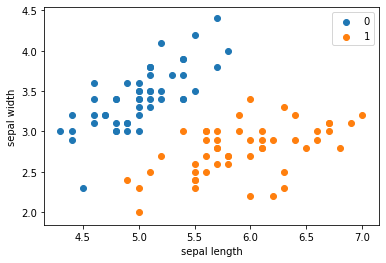

In [12]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [37]:
# 二分类感知机，仅使用前两种分类
# x的4维特征都提出来

data = np.array(df.iloc[:100, [0, 1, 2, 3, -1]])
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y])

In [38]:
class Model:
    def __init__(self):
        # x * w
        # w的维度等于x的特征维度
        
        # 4 * 1
        self.w = np.random.randn(len(data[0]) - 1)
        self.b = 0
        self.lr = 0.01
    
    def sign(self, w, x, b):
        
        return np.matmul(x, w) + b
    
    def sgdFit(self, trainX, trainY):
        # 持续循环，直到每个点都被正确分类
        while True:
            # 对误分类的点进行梯度下降
            wrongDot = 0
            for d in range(len(trainX)):
                x = trainX[d]
                y = trainY[d]
                
                if y * self.sign(self.w, x, self.b) < 0:
                    self.w = self.w + self.lr * y * x.T
                    self.b = self.b + self.lr * y
                    wrongDot += 1
            if wrongDot == 0:
                break
        print("Train over!")
    
perceptron = Model()
perceptron.sgdFit(X, y)


Train over!


In [46]:
resY = np.matmul(X, perceptron.w) + perceptron.b
resY = [1 if i >=0 else -1 for i in resY]
resY

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

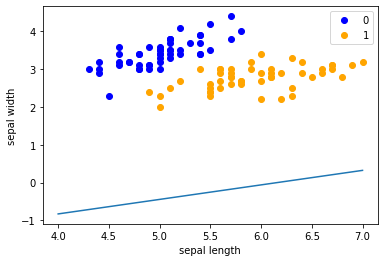

In [39]:
x_points = np.linspace(4, 7, 10)
# 这里用第一维度作为x，第二维度作为y
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [40]:
# sklearn 当中的perceptron
import sklearn
from sklearn.linear_model import Perceptron

# intecept截距
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
clf.coef_

array([[-2. , -5.5,  8.4,  4.2]])

In [48]:
# 准确率
clf.score(X, y)

1.0